## Creating Technical Indicators with Python and Pandas

*[Coding along with [Reinforcement Learning for Algorithmic Trading with Python](https://www.udemy.com/course/reinforcement-learning-for-algorithmic-trading-with-python/), an Udemy online course by Alexander Hagmann; explanations of the technical indicators are taken from the GitHub repo accompanying the course]*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# loading the dataset
data_file = "../assets/data/fin_data.csv"
data = pd.read_csv(data_file, index_col = "Datetime", usecols = ["Datetime", "Open", "High", "Low", "Close"])
data

,Open,High,Low,Close
Datetime,,,,
2022-09-13 08:00:00+00:00,1.014713,1.015744,1.013582,1.015744
2022-09-13 09:00:00+00:00,1.015022,1.016880,1.014713,1.016880
2022-09-13 10:00:00+00:00,1.016984,1.018226,1.016363,1.018226
2022-09-13 11:00:00+00:00,1.018019,1.018849,1.017812,1.018019
2022-09-13 12:00:00+00:00,1.018123,1.018226,1.003814,1.004016
...,...,...,...,...
2024-07-29 18:00:00+00:00,1.082720,1.082837,1.082251,1.082485
2024-07-29 19:00:00+00:00,1.082603,1.082837,1.082603,1.082603
2024-07-29 20:00:00+00:00,1.082603,1.082603,1.082251,1.082368


In [4]:
data.index = pd.to_datetime(data.index)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11619 entries, 2022-09-13 08:00:00+00:00 to 2024-07-29 22:00:00+00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    11619 non-null  float64
 1   High    11619 non-null  float64
 2   Low     11619 non-null  float64
 3   Close   11619 non-null  float64
dtypes: float64(4)
memory usage: 453.9 KB


In [6]:
data.head()

,Open,High,Low,Close
Datetime,,,,
2022-09-13 08:00:00+00:00,1.014713,1.015744,1.013582,1.015744
2022-09-13 09:00:00+00:00,1.015022,1.016880,1.014713,1.016880
2022-09-13 10:00:00+00:00,1.016984,1.018226,1.016363,1.018226
2022-09-13 11:00:00+00:00,1.018019,1.018849,1.017812,1.018019
2022-09-13 12:00:00+00:00,1.018123,1.018226,1.003814,1.004016


### Simple Moving Averages (SMA ratio)

__SMA Definition:__

SMA (Simple Moving Average): It's the average of a specified number of the most recent closing prices. For instance, a 50-period SMA is the average of the last 50 closing prices.

__Parameters:__<br>
sma_s = 50: This sets the window size for the short-term SMA to 50 periods (hours, in this case).<br>
sma_l = 200: This sets the window size for the long-term SMA to 200 periods (hours, in this case).<br>

__Calculating the Short-Term SMA:__<br>
data["SMA_S"] = data.Close.rolling(sma_s).mean():<br>
This line calculates the 50-period SMA for the Close price.<br>
The .rolling(sma_s) method creates a rolling window of 50 periods.<br>
The .mean() function computes the average within this window.<br>
The result is stored in a new column SMA_S.<br>

__Calculating the Long-Term SMA:__<br>
data["SMA_L"] = data.Close.rolling(sma_l).mean():<br>
Similarly, this line calculates the 200-period SMA for the Close price.<br>
It uses a rolling window of 200 periods to compute the average.<br>
The result is stored in another new column SMA_L.<br>

__Calculating the SMA Ratio:__<br>
data["SMA_ratio"] = data.SMA_L / data.SMA_S:<br>
This line calculates the ratio between the long-term SMA (SMA_L) and the short-term SMA (SMA_S).<br>
This ratio indicates the relative position of the short-term average compared to the long-term average.<br>
The resulting ratio is stored in a new column SMA_ratio.<br>

__Purpose of the SMA Ratio:__<br>
The SMA ratio can help identify trends in the market:<br>
If SMA_ratio > 1: The long-term average is higher than the short-term average, possibly indicating a downward trend.<br>
If SMA_ratio < 1: The long-term average is lower than the short-term average, possibly indicating an upward trend.<br>
By using these calculations, you can analyze the momentum and trend direction of the EUR/USD currency pair over time.

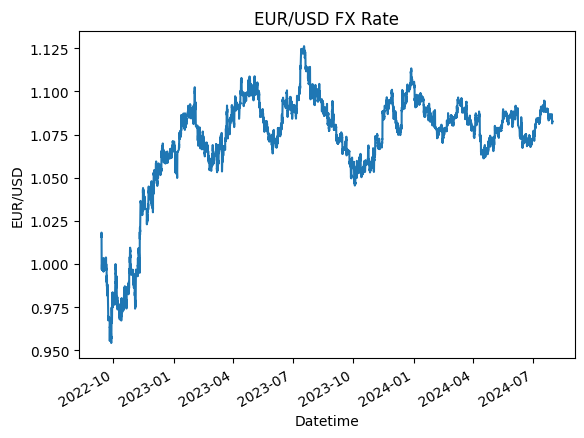

In [7]:
data.Close.plot()
plt.ylabel("EUR/USD")
plt.title("EUR/USD FX Rate")
plt.show()

In [8]:
sma_s = 50
sma_l = 200

In [9]:
data["SMA_S"] = data.Close.rolling(sma_s).mean()

In [10]:
data["SMA_L"] = data.Close.rolling(sma_l).mean()

In [11]:
data

,Open,High,Low,Close,SMA_S,SMA_L
Datetime,,,,,,
2022-09-13 08:00:00+00:00,1.014713,1.015744,1.013582,1.015744,NaN,NaN
2022-09-13 09:00:00+00:00,1.015022,1.016880,1.014713,1.016880,NaN,NaN
2022-09-13 10:00:00+00:00,1.016984,1.018226,1.016363,1.018226,NaN,NaN
2022-09-13 11:00:00+00:00,1.018019,1.018849,1.017812,1.018019,NaN,NaN
2022-09-13 12:00:00+00:00,1.018123,1.018226,1.003814,1.004016,NaN,NaN
...,...,...,...,...,...,...
2024-07-29 18:00:00+00:00,1.082720,1.082837,1.082251,1.082485,1.085196,1.087716
2024-07-29 19:00:00+00:00,1.082603,1.082837,1.082603,1.082603,1.085119,1.087656
2024-07-29 20:00:00+00:00,1.082603,1.082603,1.082251,1.082368,1.085051,1.087601


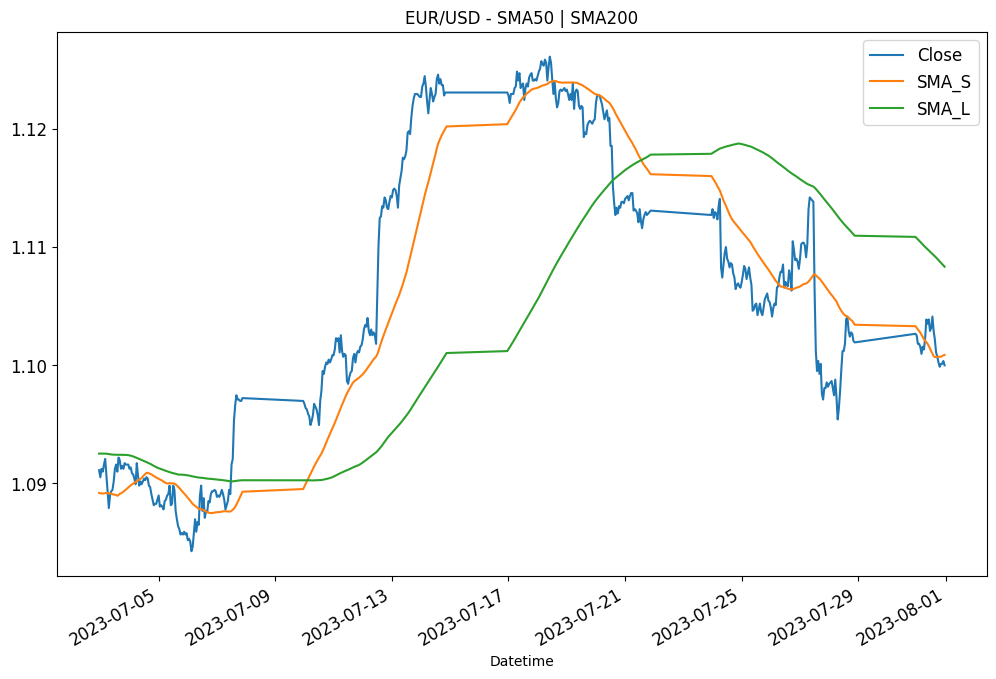

In [12]:
data.loc["2023-07", ["Close", "SMA_S", "SMA_L"]].plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [13]:
data["SMA_ratio"] = data.SMA_L / data.SMA_S
data

,Open,High,Low,Close,SMA_S,SMA_L,SMA_ratio
Datetime,,,,,,,
2022-09-13 08:00:00+00:00,1.014713,1.015744,1.013582,1.015744,NaN,NaN,NaN
2022-09-13 09:00:00+00:00,1.015022,1.016880,1.014713,1.016880,NaN,NaN,NaN
2022-09-13 10:00:00+00:00,1.016984,1.018226,1.016363,1.018226,NaN,NaN,NaN
2022-09-13 11:00:00+00:00,1.018019,1.018849,1.017812,1.018019,NaN,NaN,NaN
2022-09-13 12:00:00+00:00,1.018123,1.018226,1.003814,1.004016,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2024-07-29 18:00:00+00:00,1.082720,1.082837,1.082251,1.082485,1.085196,1.087716,1.002322
2024-07-29 19:00:00+00:00,1.082603,1.082837,1.082603,1.082603,1.085119,1.087656,1.002338
2024-07-29 20:00:00+00:00,1.082603,1.082603,1.082251,1.082368,1.085051,1.087601,1.002350


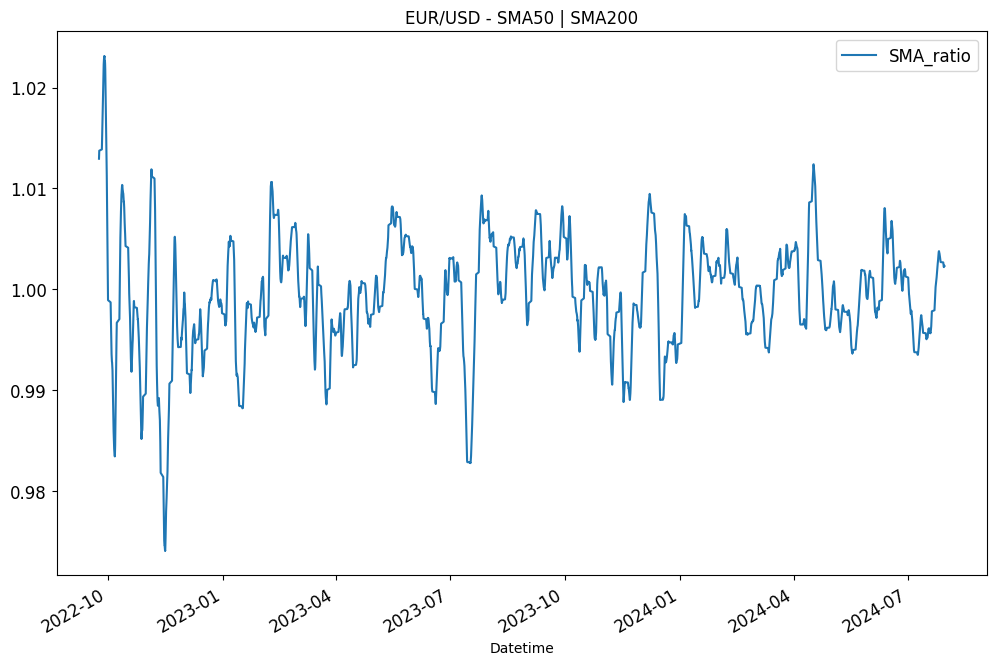

In [14]:
data.loc[:, ["SMA_ratio"]].plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

### MACD Histogram

1. MACD (Moving Average Convergence Divergence):
MACD is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price.<br>
Histogram: The difference between the MACD line and the MACD Signal line. It visually represents the strength and direction of the trend.
2. Parameters:
ema_s = 12: This sets the period for the short-term Exponential Moving Average (EMA) to 12 periods (hours in this context).<br>
ema_l = 26: This sets the period for the long-term EMA to 26 periods (hours in this context).
3. Calculating the Short-Term EMA:
data["EMA_S"] = data.Close.ewm(span = ema_s, min_periods = ema_s).mean():<br>
This calculates the 12-period EMA of the Close price.<br>
.ewm(span = ema_s) applies an exponential weighting, giving more importance to recent data.<br>
The .mean() function computes the average, which updates as new data points are added.
The result is stored in a new column EMA_S.
4. Calculating the Long-Term EMA:
data["EMA_L"] = data.Close.ewm(span = ema_l, min_periods = ema_l).mean():<br>
Similarly, this calculates the 26-period EMA of the Close price.<br>
It uses a longer window, giving a smoother average that reacts more slowly to price changes.
The result is stored in a new column EMA_L.
5. Plotting the Close Price and EMAs:
data.loc["2023-07", ["Close", "EMA_S", "EMA_L"]].plot(figsize = (12, 8)):<br>
This line plots the Close price, Short-term EMA (12), and Long-term EMA (26) for July 2023.<br>
loc["2023-07"] filters the data for the specified month.<br>
The plot helps visualize how the short and long EMAs compare to the Close price.
6. Calculating the MACD Line:
data["MACD"] = data.EMA_S - data.EMA_L:<br>
This line calculates the difference between the short-term EMA (EMA_S) and the long-term EMA (EMA_L).<br>
The result is the MACD line, which oscillates above and below zero, indicating momentum direction.<br>
The MACD line is stored in a new column MACD.
7. Calculating the Signal Line:
signal_mw = 9: This sets the period for the Signal line to 9 periods (hours).<br>
data["MACD_Signal"] = data.MACD.ewm(span = signal_mw, min_periods = signal_mw).mean():<br>
The Signal line is a 9-period EMA of the MACD line.<br>
This line smooths the MACD to make it easier to interpret trend changes.<br>
The result is stored in a new column MACD_Signal.<br>
8. Calculating the MACD Histogram:
data["MACD_hist"] = data.MACD - data.MACD_Signal:<br>
The MACD Histogram is the difference between the MACD line and the Signal line.<br>
It visually represents the momentum of the trend, with positive values indicating upward momentum and negative values indicating downward momentum.<br>
The result is stored in a new column MACD_hist.
9. Purpose of the MACD Histogram:
Positive Histogram: When the MACD is above the Signal line, indicating bullish momentum.<br>
Negative Histogram: When the MACD is below the Signal line, indicating bearish momentum.<br>
The histogram bars help traders identify potential buy/sell signals based on the strength of the trend.<br>
By using these calculations, you can analyze the momentum and possible trend reversals in the EUR/USD currency pair.

In [15]:
ema_s = 12 # EMA Short
ema_l = 26 # EMA Long

In [17]:
data["EMA_S"] = data.Close.ewm(span = ema_s, min_periods = ema_s).mean() 
data["EMA_L"] = data.Close.ewm(span = ema_l, min_periods = ema_l).mean() 
data

,Open,High,Low,Close,SMA_S,SMA_L,SMA_ratio,EMA_S,EMA_L
Datetime,,,,,,,,,
2022-09-13 08:00:00+00:00,1.014713,1.015744,1.013582,1.015744,NaN,NaN,NaN,NaN,NaN
2022-09-13 09:00:00+00:00,1.015022,1.016880,1.014713,1.016880,NaN,NaN,NaN,NaN,NaN
2022-09-13 10:00:00+00:00,1.016984,1.018226,1.016363,1.018226,NaN,NaN,NaN,NaN,NaN
2022-09-13 11:00:00+00:00,1.018019,1.018849,1.017812,1.018019,NaN,NaN,NaN,NaN,NaN
2022-09-13 12:00:00+00:00,1.018123,1.018226,1.003814,1.004016,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-07-29 18:00:00+00:00,1.082720,1.082837,1.082251,1.082485,1.085196,1.087716,1.002322,1.083059,1.084040
2024-07-29 19:00:00+00:00,1.082603,1.082837,1.082603,1.082603,1.085119,1.087656,1.002338,1.082988,1.083934
2024-07-29 20:00:00+00:00,1.082603,1.082603,1.082251,1.082368,1.085051,1.087601,1.002350,1.082893,1.083818


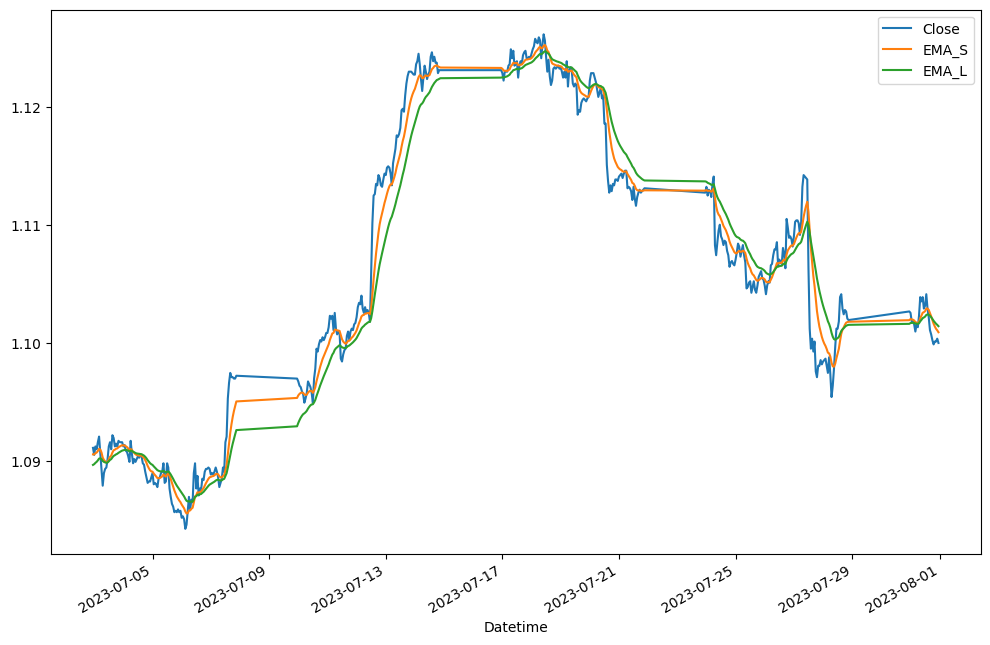

In [18]:
data.loc["2023-07", ["Close", "EMA_S", "EMA_L"]].plot(figsize = (12, 8))
plt.show()

In [19]:
data["MACD"] = data.EMA_S - data.EMA_L
data

,Open,High,Low,Close,SMA_S,SMA_L,SMA_ratio,EMA_S,EMA_L,MACD
Datetime,,,,,,,,,,
2022-09-13 08:00:00+00:00,1.014713,1.015744,1.013582,1.015744,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-13 09:00:00+00:00,1.015022,1.016880,1.014713,1.016880,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-13 10:00:00+00:00,1.016984,1.018226,1.016363,1.018226,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-13 11:00:00+00:00,1.018019,1.018849,1.017812,1.018019,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-13 12:00:00+00:00,1.018123,1.018226,1.003814,1.004016,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-07-29 18:00:00+00:00,1.082720,1.082837,1.082251,1.082485,1.085196,1.087716,1.002322,1.083059,1.084040,-0.000981
2024-07-29 19:00:00+00:00,1.082603,1.082837,1.082603,1.082603,1.085119,1.087656,1.002338,1.082988,1.083934,-0.000945
2024-07-29 20:00:00+00:00,1.082603,1.082603,1.082251,1.082368,1.085051,1.087601,1.002350,1.082893,1.083818,-0.000925


In [20]:
signal_mw = 9 # Moving Window for Signal Line

In [21]:
data["MACD_Signal"] = data.MACD.ewm(span = signal_mw, min_periods = signal_mw).mean() 
data

,Open,High,Low,Close,SMA_S,SMA_L,SMA_ratio,EMA_S,EMA_L,MACD,MACD_Signal
Datetime,,,,,,,,,,,
2022-09-13 08:00:00+00:00,1.014713,1.015744,1.013582,1.015744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-13 09:00:00+00:00,1.015022,1.016880,1.014713,1.016880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-13 10:00:00+00:00,1.016984,1.018226,1.016363,1.018226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-13 11:00:00+00:00,1.018019,1.018849,1.017812,1.018019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-13 12:00:00+00:00,1.018123,1.018226,1.003814,1.004016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-07-29 18:00:00+00:00,1.082720,1.082837,1.082251,1.082485,1.085196,1.087716,1.002322,1.083059,1.084040,-0.000981,-0.000820
2024-07-29 19:00:00+00:00,1.082603,1.082837,1.082603,1.082603,1.085119,1.087656,1.002338,1.082988,1.083934,-0.000945,-0.000845
2024-07-29 20:00:00+00:00,1.082603,1.082603,1.082251,1.082368,1.085051,1.087601,1.002350,1.082893,1.083818,-0.000925,-0.000861


In [22]:
data["MACD_hist"] = data.MACD - data.MACD_Signal
data

,Open,High,Low,Close,SMA_S,SMA_L,SMA_ratio,EMA_S,EMA_L,MACD,MACD_Signal,MACD_hist
Datetime,,,,,,,,,,,,
2022-09-13 08:00:00+00:00,1.014713,1.015744,1.013582,1.015744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-13 09:00:00+00:00,1.015022,1.016880,1.014713,1.016880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-13 10:00:00+00:00,1.016984,1.018226,1.016363,1.018226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-13 11:00:00+00:00,1.018019,1.018849,1.017812,1.018019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-13 12:00:00+00:00,1.018123,1.018226,1.003814,1.004016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-29 18:00:00+00:00,1.082720,1.082837,1.082251,1.082485,1.085196,1.087716,1.002322,1.083059,1.084040,-0.000981,-0.000820,-0.000161
2024-07-29 19:00:00+00:00,1.082603,1.082837,1.082603,1.082603,1.085119,1.087656,1.002338,1.082988,1.083934,-0.000945,-0.000845,-0.000100
2024-07-29 20:00:00+00:00,1.082603,1.082603,1.082251,1.082368,1.085051,1.087601,1.002350,1.082893,1.083818,-0.000925,-0.000861,-0.000064


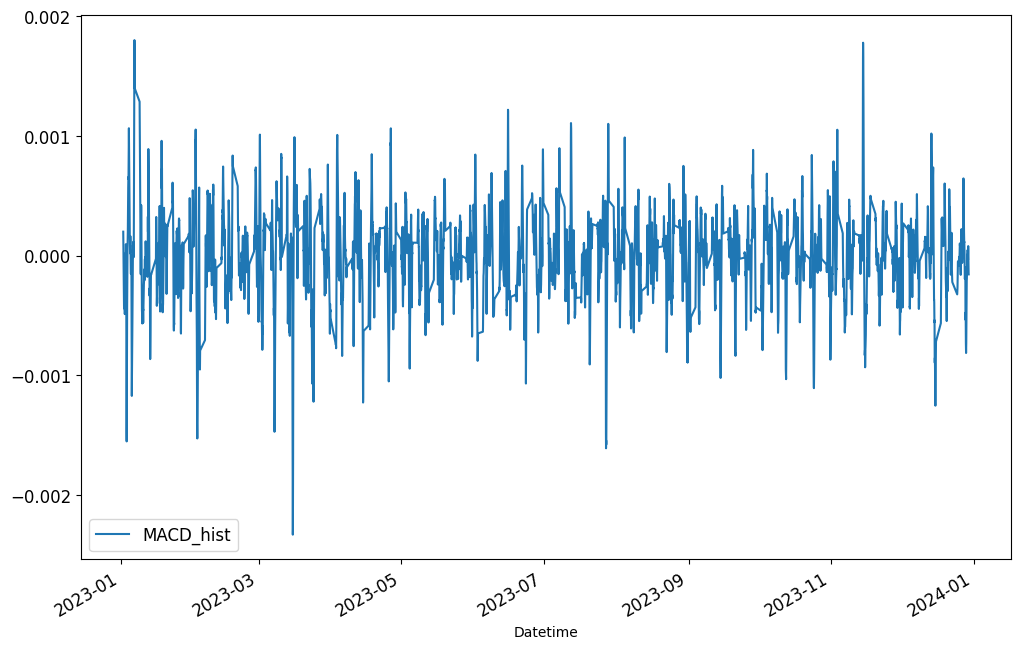

In [23]:
data.loc["2023", ["MACD_hist"]].plot(figsize = (12, 8), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

### RSI

1. RSI (Relative Strength Index):
RSI is a momentum oscillator that measures the speed and change of price movements. It ranges from 0 to 100 and is used to identify overbought or oversold conditions in the market.
2. Calculating Upward and Downward Price Movements:
data["U"] = np.where(data.Close.diff() > 0, data.Close.diff(), 0):<br>
This line calculates the difference between the current and previous close prices using data.Close.diff().<br>
If the difference is positive (indicating a price increase), the value is recorded in the U column.<br>
If the difference is not positive, the value in the U column is set to 0 (indicating no upward movement).<br>
data["D"] = np.where(data.Close.diff() < 0, -data.Close.diff(), 0):<br>
Similarly, this calculates the downward price movements.<br>
If the difference is negative (indicating a price decrease), the absolute value is recorded in the D column.<br>
If the difference is not negative, the value in the D column is set to 0 (indicating no downward movement).<br>
3. Setting the RSI Period:
periods = 20:<br>
This sets the period over which the RSI will be calculated, typically 14 or 20 periods are used.<br>
4. Calculating the Moving Averages of Upward and Downward Movements:
data["MA_U"] = data.U.rolling(periods).mean():<br>
This line calculates the moving average of the upward price movements over the specified period.<br>
It creates a rolling window of 20 periods and computes the average of the U column.<br>
The result is stored in a new column MA_U.<br>
data["MA_D"] = data.D.rolling(periods).mean():<br>
Similarly, this calculates the moving average of the downward price movements over the specified period.<br>
It creates a rolling window of 20 periods and computes the average of the D column.<br>
The result is stored in a new column MA_D.
5. Calculating the RSI:
data["RSI"] = data.MA_U / (data.MA_U + data.MA_D) * 100:<br>
The RSI is calculated by dividing the moving average of upward movements (MA_U) by the sum of the moving averages of upward (MA_U) and downward (MA_D) movements.<br>
This ratio is then multiplied by 100 to convert it to a percentage.<br>
The resulting RSI value ranges from 0 to 100, indicating the strength of recent price movements.<br>
The result is stored in a new column RSI.<br>
6. Purpose of the RSI:
Overbought Condition: Typically, an RSI above 70 indicates that the asset may be overbought and could be due for a correction or pullback.<br>
Oversold Condition: An RSI below 30 suggests that the asset may be oversold and could be due for a rebound.<br>
Trend Indicator: RSI values between 30 and 70 can also indicate the strength of the current trend, with values closer to 50 suggesting a more neutral momentum.<br>

By using this RSI calculation, traders can analyze whether the EUR/USD currency pair is potentially overbought or oversold, helping them make informed trading decisions.

In [25]:
data["U"] = np.where(data.Close.diff() > 0, data.Close.diff(), 0)
data["D"] = np.where(data.Close.diff() < 0, -data.Close.diff(), 0)
data

,Open,High,Low,Close,SMA_S,SMA_L,SMA_ratio,EMA_S,EMA_L,MACD,MACD_Signal,MACD_hist,U,D
Datetime,,,,,,,,,,,,,,
2022-09-13 08:00:00+00:00,1.014713,1.015744,1.013582,1.015744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2022-09-13 09:00:00+00:00,1.015022,1.016880,1.014713,1.016880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001136,0.000000
2022-09-13 10:00:00+00:00,1.016984,1.018226,1.016363,1.018226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001346,0.000000
2022-09-13 11:00:00+00:00,1.018019,1.018849,1.017812,1.018019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000207
2022-09-13 12:00:00+00:00,1.018123,1.018226,1.003814,1.004016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.014003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-29 18:00:00+00:00,1.082720,1.082837,1.082251,1.082485,1.085196,1.087716,1.002322,1.083059,1.084040,-0.000981,-0.000820,-0.000161,0.000000,0.000352
2024-07-29 19:00:00+00:00,1.082603,1.082837,1.082603,1.082603,1.085119,1.087656,1.002338,1.082988,1.083934,-0.000945,-0.000845,-0.000100,0.000117,0.000000
2024-07-29 20:00:00+00:00,1.082603,1.082603,1.082251,1.082368,1.085051,1.087601,1.002350,1.082893,1.083818,-0.000925,-0.000861,-0.000064,0.000000,0.000234


In [26]:
periods = 20

In [29]:
data["MA_U"] = data.U.rolling(periods).mean()
data["MA_D"] = data.D.rolling(periods).mean()

In [30]:
data["RSI"] = data.MA_U / (data.MA_U + data.MA_D) * 100

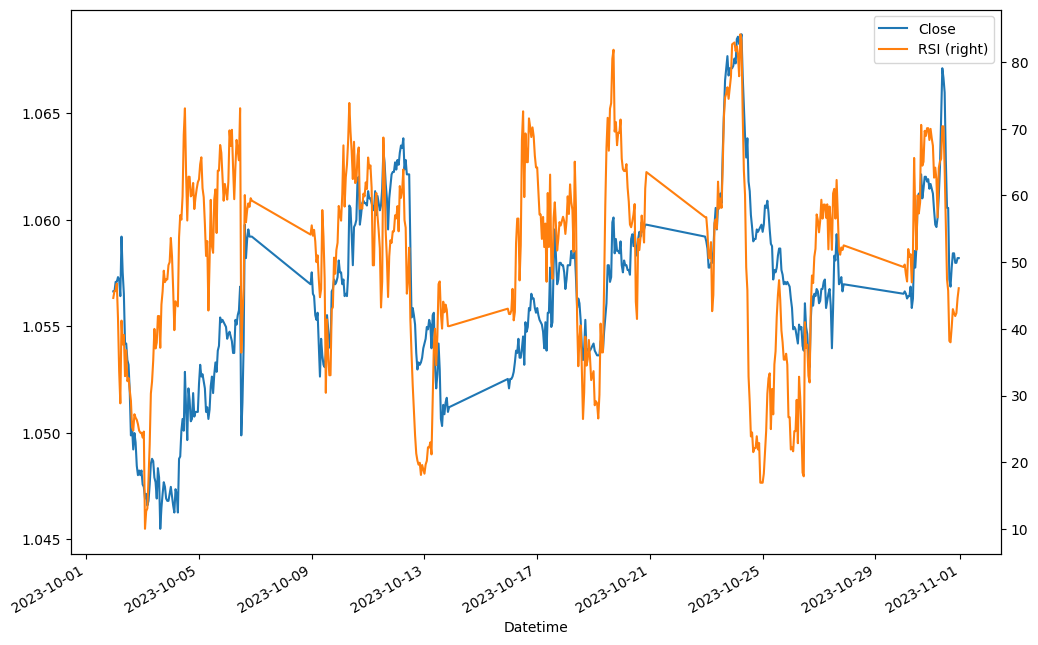

In [31]:
data.loc["2023-10", ["Close", "RSI"]].plot(figsize = (12, 8), secondary_y = "RSI")
plt.show()

### Stochastic Oscillator (difference %K minus %D)

1. Stochastic Oscillator Overview:
The Stochastic Oscillator is a momentum indicator that compares the closing price of an asset to its price range over a specified period. It is used to identify potential overbought or oversold conditions in the market.
2. Setting the Period for Stochastic Calculation:
periods = 14:<br>
This sets the look-back period to 14, which is a common setting for calculating the Stochastic Oscillator.
It will consider the last 14 periods (hours, in this context) for the calculation.
3. Calculating the Rolling Low and High:
data["roll_low"] = data.Low.rolling(periods).min():<br>
This line calculates the lowest low over the last 14 periods.<br>
It creates a rolling window of 14 periods and finds the minimum value in the Low column.<br>
The result is stored in a new column roll_low.<br>
data["roll_high"] = data.High.rolling(periods).max():<br>
Similarly, this calculates the highest high over the last 14 periods.<br>
It creates a rolling window of 14 periods and finds the maximum value in the High column.<br>
The result is stored in a new column roll_high.
4. Calculating the %K Line (Fast Stochastic Oscillator):
data["K"] = (data.Close - data.roll_low) / (data.roll_high - data.roll_low) * 100:<br>
The %K line represents the current close price relative to the 14-period price range.<br>
It is calculated by subtracting the 14-period low (roll_low) from the current close price and dividing the result by the difference between the 14-period high (roll_high) and the 14-period low (roll_low).<br>
This ratio is then multiplied by 100 to convert it into a percentage, indicating the position of the close price within the 14-period range.<br>
The result is stored in a new column K.
5. Setting the Moving Average Period for %D Line:
moving_av = 3:<br>
This sets the period for calculating the %D line, which is a 3-period moving average of the %K line.
6. Calculating the %D Line (Slow Stochastic Oscillator):
data["D"] = data.K.rolling(moving_av).mean():<br>
The %D line is a 3-period simple moving average of the %K line.<br>
It smooths out the %K values to provide a clearer signal.<br>
The result is stored in a new column D.
7. Calculating the Stochastic Oscillator Difference:
data["SO_diff"] = data["K"] - data["D"]:<br>
This line calculates the difference between the %K line and the %D line.<br>
The result is stored in a new column SO_diff.<br>
This difference can indicate potential buy/sell signals:<br>
Positive SO_diff: When %K is above %D, it suggests upward momentum.<br>
Negative SO_diff: When %K is below %D, it suggests downward momentum.
8. Purpose of the Stochastic Oscillator:
Overbought Condition: Typically, values above 80 suggest that the asset may be overbought and could be due for a pullback.<br>
Oversold Condition: Values below 20 suggest that the asset may be oversold and could be due for a rebound.<br>
Trend Indicator: Crossovers of the %K and %D lines can indicate potential trend reversals or continuation.<br>
By using these calculations, you can analyze the momentum of the EUR/USD currency pair over time and identify potential turning points in the market.

In [32]:
periods = 14

In [33]:
data["roll_low"] = data.Low.rolling(periods).min()
data["roll_high"] = data.High.rolling(periods).max()
data

,Open,High,Low,Close,SMA_S,SMA_L,SMA_ratio,EMA_S,EMA_L,MACD,MACD_Signal,MACD_hist,U,D,MA_U,MA_D,RSI,roll_low,roll_high
Datetime,,,,,,,,,,,,,,,,,,,
2022-09-13 08:00:00+00:00,1.014713,1.015744,1.013582,1.015744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2022-09-13 09:00:00+00:00,1.015022,1.016880,1.014713,1.016880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001136,0.000000,NaN,NaN,NaN,NaN,NaN
2022-09-13 10:00:00+00:00,1.016984,1.018226,1.016363,1.018226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001346,0.000000,NaN,NaN,NaN,NaN,NaN
2022-09-13 11:00:00+00:00,1.018019,1.018849,1.017812,1.018019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000207,NaN,NaN,NaN,NaN,NaN
2022-09-13 12:00:00+00:00,1.018123,1.018226,1.003814,1.004016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.014003,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-29 18:00:00+00:00,1.082720,1.082837,1.082251,1.082485,1.085196,1.087716,1.002322,1.083059,1.084040,-0.000981,-0.000820,-0.000161,0.000000,0.000352,0.000159,0.000323,32.924687,1.080614,1.086602
2024-07-29 19:00:00+00:00,1.082603,1.082837,1.082603,1.082603,1.085119,1.087656,1.002338,1.082988,1.083934,-0.000945,-0.000845,-0.000100,0.000117,0.000000,0.000164,0.000311,34.565767,1.080614,1.086484
2024-07-29 20:00:00+00:00,1.082603,1.082603,1.082251,1.082368,1.085051,1.087601,1.002350,1.082893,1.083818,-0.000925,-0.000861,-0.000064,0.000000,0.000234,0.000100,0.000323,23.563915,1.080614,1.086130


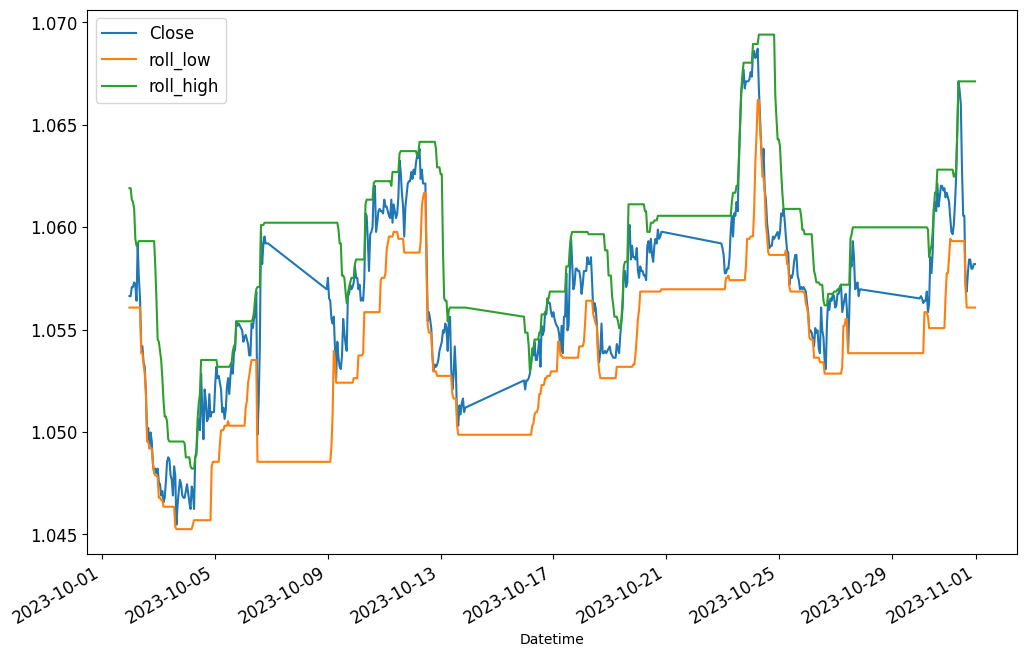

In [34]:
data.loc["2023-10", ["Close", "roll_low", "roll_high"]].plot(figsize = (12, 8), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [35]:
data["K"] = (data.Close - data.roll_low) / (data.roll_high - data.roll_low) * 100

In [36]:
moving_av = 3

In [37]:
data["D"] = data.K.rolling(moving_av).mean()

In [38]:
data

,Open,High,Low,Close,SMA_S,SMA_L,SMA_ratio,EMA_S,EMA_L,MACD,MACD_Signal,MACD_hist,U,D,MA_U,MA_D,RSI,roll_low,roll_high,K
Datetime,,,,,,,,,,,,,,,,,,,,
2022-09-13 08:00:00+00:00,1.014713,1.015744,1.013582,1.015744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-13 09:00:00+00:00,1.015022,1.016880,1.014713,1.016880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-13 10:00:00+00:00,1.016984,1.018226,1.016363,1.018226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-13 11:00:00+00:00,1.018019,1.018849,1.017812,1.018019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-13 12:00:00+00:00,1.018123,1.018226,1.003814,1.004016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-29 18:00:00+00:00,1.082720,1.082837,1.082251,1.082485,1.085196,1.087716,1.002322,1.083059,1.084040,-0.000981,-0.000820,-0.000161,0.000000,32.816646,0.000159,0.000323,32.924687,1.080614,1.086602,31.255101
2024-07-29 19:00:00+00:00,1.082603,1.082837,1.082603,1.082603,1.085119,1.087656,1.002338,1.082988,1.083934,-0.000945,-0.000845,-0.000100,0.000117,34.086960,0.000164,0.000311,34.565767,1.080614,1.086484,33.880270
2024-07-29 20:00:00+00:00,1.082603,1.082603,1.082251,1.082368,1.085051,1.087601,1.002350,1.082893,1.083818,-0.000925,-0.000861,-0.000064,0.000000,32.313627,0.000100,0.000323,23.563915,1.080614,1.086130,31.805511


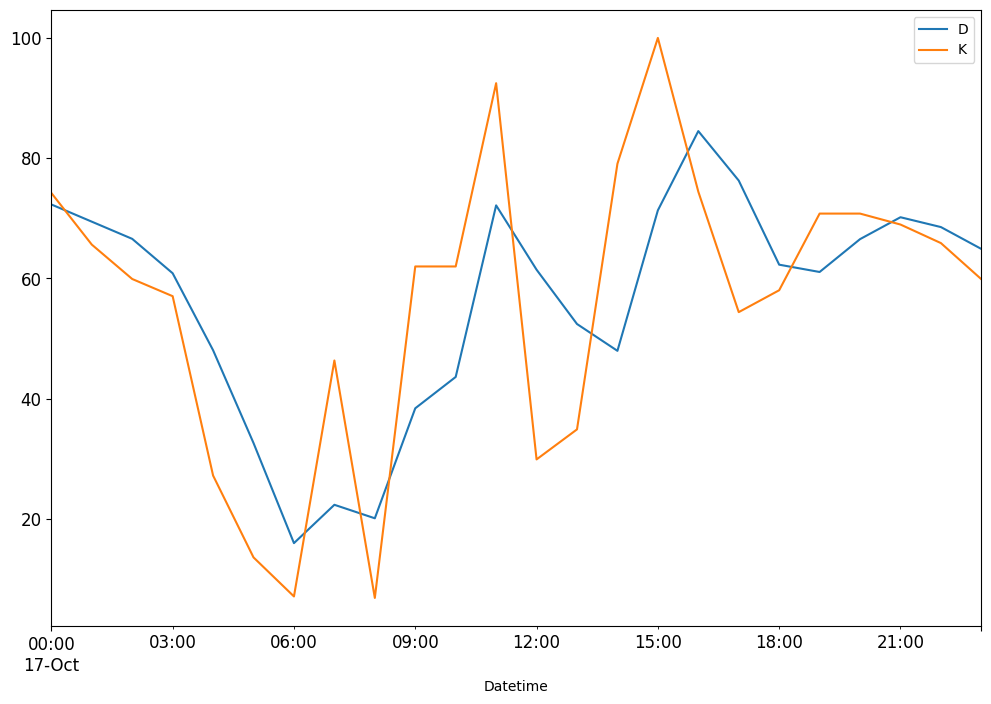

In [39]:
data.loc["2023-10-17", ["D", "K"]].plot(figsize = (12, 8), fontsize = 12)
plt.show()

<Axes: xlabel='Datetime'>

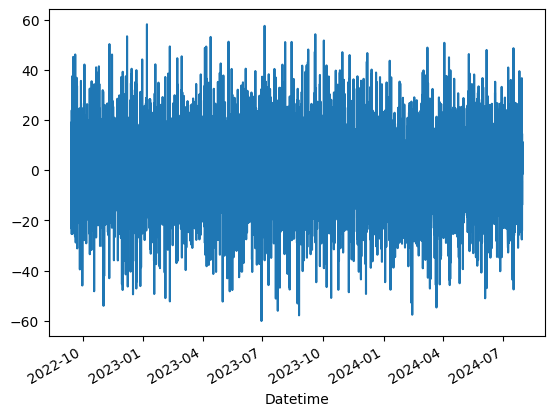

In [40]:
(data["K"] - data["D"]).plot()

In [41]:
data["SO_diff"] = data["K"] - data["D"]
data

,Open,High,Low,Close,SMA_S,SMA_L,SMA_ratio,EMA_S,EMA_L,MACD,...,MACD_hist,U,D,MA_U,MA_D,RSI,roll_low,roll_high,K,SO_diff
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-09-13 08:00:00+00:00,1.014713,1.015744,1.013582,1.015744,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-13 09:00:00+00:00,1.015022,1.016880,1.014713,1.016880,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.001136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-13 10:00:00+00:00,1.016984,1.018226,1.016363,1.018226,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.001346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-13 11:00:00+00:00,1.018019,1.018849,1.017812,1.018019,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-13 12:00:00+00:00,1.018123,1.018226,1.003814,1.004016,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-29 18:00:00+00:00,1.082720,1.082837,1.082251,1.082485,1.085196,1.087716,1.002322,1.083059,1.084040,-0.000981,...,-0.000161,0.000000,32.816646,0.000159,0.000323,32.924687,1.080614,1.086602,31.255101,-1.561545
2024-07-29 19:00:00+00:00,1.082603,1.082837,1.082603,1.082603,1.085119,1.087656,1.002338,1.082988,1.083934,-0.000945,...,-0.000100,0.000117,34.086960,0.000164,0.000311,34.565767,1.080614,1.086484,33.880270,-0.206691
2024-07-29 20:00:00+00:00,1.082603,1.082603,1.082251,1.082368,1.085051,1.087601,1.002350,1.082893,1.083818,-0.000925,...,-0.000064,0.000000,32.313627,0.000100,0.000323,23.563915,1.080614,1.086130,31.805511,-0.508117


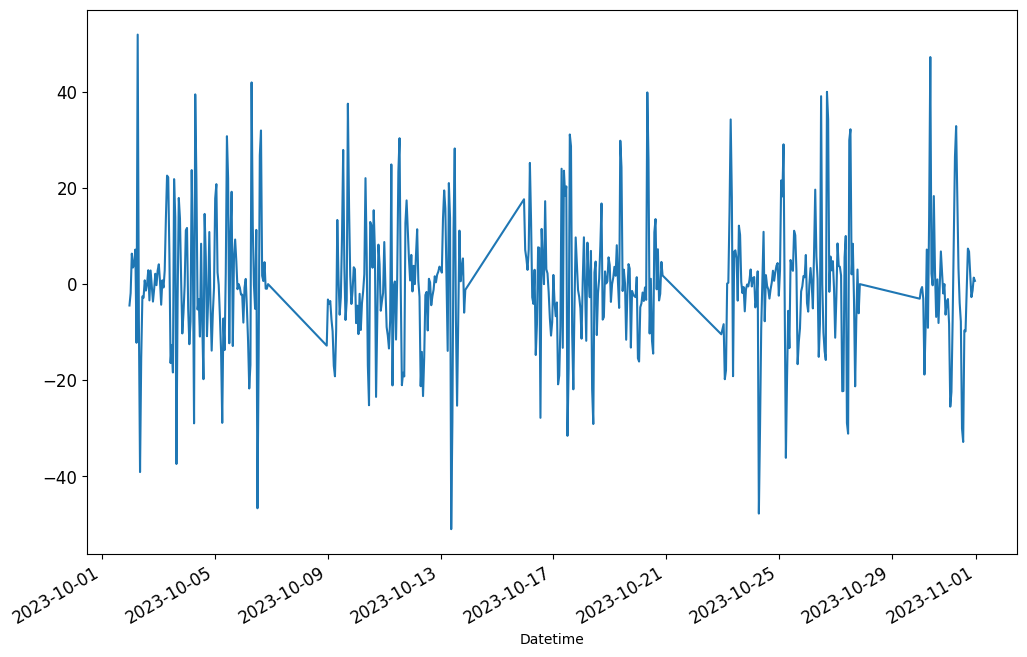

In [42]:
data.loc["2023-10", "SO_diff"].plot(figsize = (12, 8), fontsize = 12)
plt.show()